### DATA COLLECTION


In [1]:
# install liac-arff if not already installed
%pip install liac-arff
 # Convert ARFF file to Pandas DataFrame
import arff
import pandas as pd

with open('dataset.arff', 'r', encoding='utf-8') as f:
	dataset = arff.load(f)

columns = [attr[0] for attr in dataset['attributes']]
df = pd.DataFrame(dataset['data'], columns=columns)
print(df.head())

Note: you may need to restart the kernel to use updated packages.
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


In [2]:
df.to_csv('dataset.csv', index=False)   

In [3]:
# load the CSV to verify
data = pd.read_csv('dataset.csv')
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
data.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [5]:
import pandas as pd
import numpy as np

DATA_PATH = "dataset.csv"   # keep relative path for portability

df = pd.read_csv(DATA_PATH)

# Build datetime from year/month/day/hour
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
df = df.drop(columns=["No"])  # not useful for modeling

# Sort for safety
df = df.sort_values(["station", "datetime"]).reset_index(drop=True)

df.head()


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


. We create a single datetime column so the data behaves like a real time series.

. We sort by station, datetime to preserve temporal order (critical for forecasting).

In [6]:
print("Shape:", df.shape)
print("Stations:", df["station"].nunique())
print("Datetime range:", df["datetime"].min(), "→", df["datetime"].max())

# Check duplicates per station-hour
dup_count = df.duplicated(subset=["station", "datetime"]).sum()
print("Duplicate station-hour rows:", dup_count)

# Missing values summary
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0].to_frame("missing_frac").head(20)


Shape: (420768, 18)
Stations: 12
Datetime range: 2013-03-01 00:00:00 → 2017-02-28 23:00:00
Duplicate station-hour rows: 0


,missing_frac
CO,0.049198
O3,0.031554
NO2,0.028795
SO2,0.021439
PM2.5,0.020769
PM10,0.015327
wd,0.004330
DEWP,0.000958
TEMP,0.000946
PRES,0.000934


Station: Aotizhongxin | rows: 35064


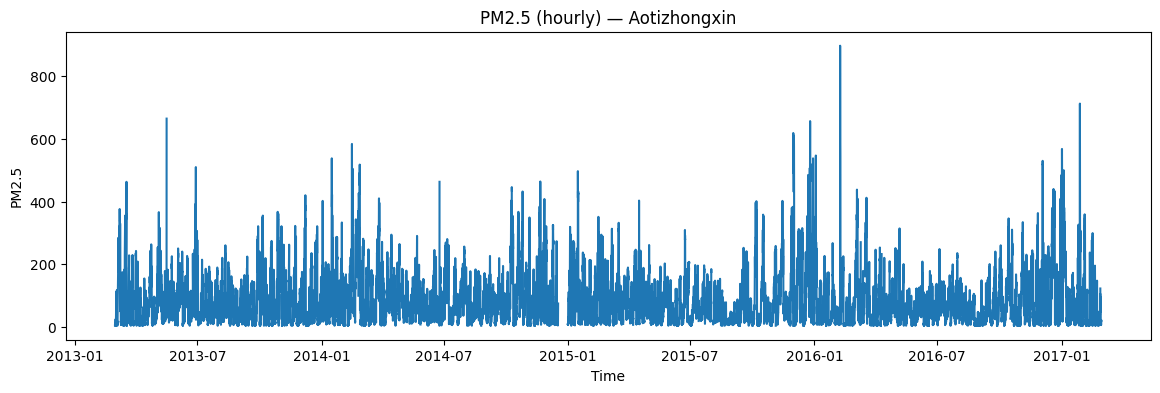

In [7]:
import matplotlib.pyplot as plt

STATION = df["station"].value_counts().index[0]  # pick the most complete station automatically
TARGET = "PM2.5"

s = (df[df["station"] == STATION]
     .set_index("datetime")
     .sort_index())

print("Station:", STATION, "| rows:", len(s))

plt.figure(figsize=(14,4))
plt.plot(s.index, s[TARGET])
plt.title(f"{TARGET} (hourly) — {STATION}")
plt.xlabel("Time")
plt.ylabel(TARGET)
plt.show()


Hourly plots often look “spiky” (pollution is like that). Decomposition will work better on daily aggregation, while ARIMA can still be trained on hourly later.

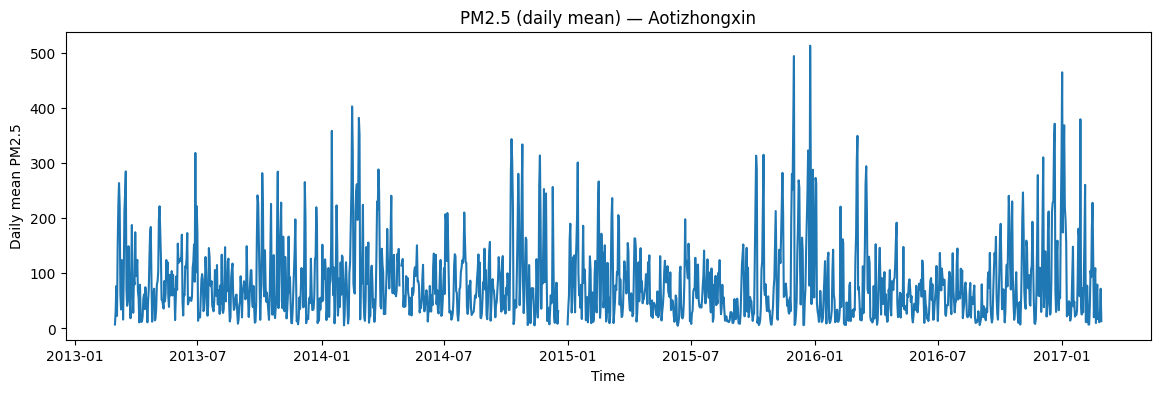

,PM2.5
datetime,
2013-03-01,7.125000
2013-03-02,30.750000
2013-03-03,76.916667
2013-03-04,22.708333
2013-03-05,148.875000


In [8]:
daily = s.resample("D").mean(numeric_only=True)

plt.figure(figsize=(14,4))
plt.plot(daily.index, daily[TARGET])
plt.title(f"{TARGET} (daily mean) — {STATION}")
plt.xlabel("Time")
plt.ylabel(f"Daily mean {TARGET}")
plt.show()

daily[[TARGET]].head()


Daily averaging reduces noise and exposes trend + seasonality more clearly.

We’ll do decomposition on daily first. (Later we can decide hourly vs daily for Auto-ARIMA.)

In [10]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.6 MB 4.7 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 6.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.6 MB 4.6 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 4.6 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.6 MB 3.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.6 MB 3.3 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.6 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 2.8 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 2.7 MB/s eta 0:00:02
   -------------------------- ---

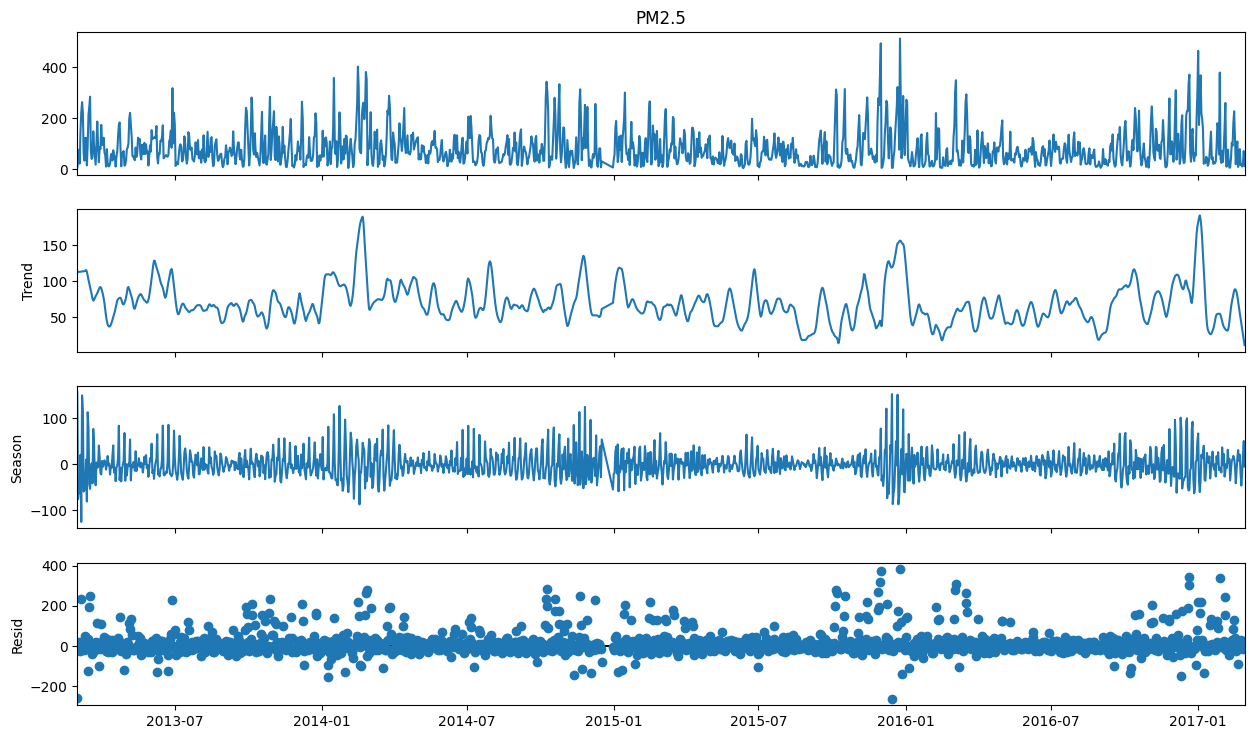

In [11]:
from statsmodels.tsa.seasonal import STL

# For daily data, a natural seasonal period is 7 (weekly) or 365 (yearly).
# Yearly requires enough data and is heavier; we'll start with weekly.
stl = STL(daily[TARGET].dropna(), period=7, robust=True)
res = stl.fit()

fig = res.plot()
fig.set_size_inches(14, 8)
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

x = daily[TARGET].dropna()

adf = adfuller(x, autolag="AIC")
print("ADF Statistic:", adf[0])
print("ADF p-value   :", adf[1])

kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss(x, regression="c", nlags="auto")
print("\nKPSS Statistic:", kpss_stat)
print("KPSS p-value   :", kpss_p)
print("KPSS lags used :", kpss_lags)


ADF Statistic: -17.445699401939677
ADF p-value   : 4.682694126148707e-30

KPSS Statistic: 0.17308320455891726
KPSS p-value   : 0.1
KPSS lags used : 13


C:\Users\judew\AppData\Local\Temp\ipykernel_9460\2395936214.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, kpss_lags, kpss_crit = kpss(x, regression="c", nlags="auto")


If ADF p > 0.05 → fail to reject non-stationarity → likely needs differencing.

If KPSS p < 0.05 → reject stationarity → also suggests differencing.

If both scream “not stationary,” we difference (usually first difference; sometimes seasonal difference too).

ADF p-value after 1st diff: 1.8240637027993769e-25
KPSS p-value after 1st diff: 0.1


C:\Users\judew\AppData\Local\Temp\ipykernel_9460\3839465542.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss1 = kpss(x1, regression="c", nlags="auto")


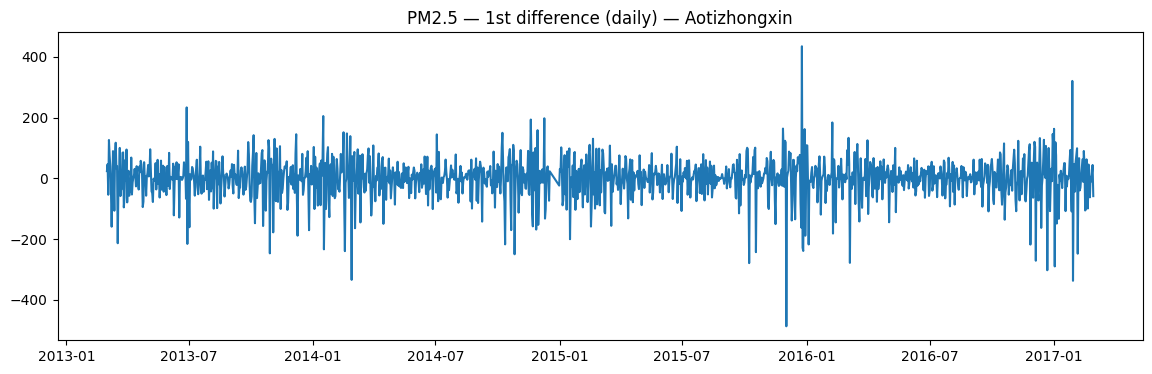

In [13]:
x1 = x.diff().dropna()

adf1 = adfuller(x1, autolag="AIC")
print("ADF p-value after 1st diff:", adf1[1])

kpss1 = kpss(x1, regression="c", nlags="auto")
print("KPSS p-value after 1st diff:", kpss1[1])

plt.figure(figsize=(14,4))
plt.plot(x1.index, x1)
plt.title(f"{TARGET} — 1st difference (daily) — {STATION}")
plt.show()
